In [1]:
import pandas as pd

# Load the cleaned data
reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_comments = pd.read_csv("reddit_comments_clean_final.csv")

print(reddit_posts.shape)
print(reddit_comments.shape)
reddit_posts.head()
reddit_comments.head()

(67926, 9)
(836812, 10)


,comment_id,post_id,content,author,date,order,score,parent_id,link_id,permalink
0,n3im5vo,1m1osj2,dont forget to check out our resources wiki pa...,AutoModerator,2025-07-16 21:15:00+00:00,1,1,t3_1m1osj2,t3_1m1osj2,/r/addiction/comments/1m1osj2/i_just_crave_the...
1,n3iewia,1m1nymh,dont forget to check out our resources wiki pa...,AutoModerator,2025-07-16 20:42:17+00:00,1,1,t3_1m1nymh,t3_1m1nymh,/r/addiction/comments/1m1nymh/being_an_addict_...
2,n3iae4z,1m1ng2l,dont forget to check out our resources wiki pa...,AutoModerator,2025-07-16 20:22:05+00:00,1,1,t3_1m1ng2l,t3_1m1ng2l,/r/addiction/comments/1m1ng2l/how_to_overcome_...
3,n3idl6x,1m1ng2l,you need a therapist seriously i dont think th...,folgerscoffees,2025-07-16 20:36:23+00:00,2,1,t3_1m1ng2l,t3_1m1ng2l,/r/addiction/comments/1m1ng2l/how_to_overcome_...
4,n3igkeq,1m1ng2l,i think i have a method basically you put up a...,eni95,2025-07-16 20:49:39+00:00,3,1,t3_1m1ng2l,t3_1m1ng2l,/r/addiction/comments/1m1ng2l/how_to_overcome_...


In [2]:
# Step 2: Lowercasing and Punctuation Removal

import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply to both posts and comments
reddit_posts['content_clean'] = reddit_posts['content'].apply(clean_text)
reddit_comments['content_clean'] = reddit_comments['content'].apply(clean_text)

# Inspect result
print(reddit_posts['content_clean'].head())
print(reddit_comments['content_clean'].head())

0    is she sabotaging things i dont know what to d...
1    i just crave the silence all i crave is silenc...
2    being an addict around worse addicts uk i was ...
3    how to overcome any type on addiction for the ...
4    found zyn in my dads drawer accidentally what ...
Name: content_clean, dtype: object
0    dont forget to check out our resources wiki pa...
1    dont forget to check out our resources wiki pa...
2    dont forget to check out our resources wiki pa...
3    you need a therapist seriously i dont think th...
4    i think i have a method basically you put up a...
Name: content_clean, dtype: object


In [3]:
# Step 3: Tokenization

import nltk
nltk.download('punkt')

def tokenize_text(text):
    # Tokenize the cleaned text into words
    return nltk.word_tokenize(text)

# Apply to both posts and comments
reddit_posts['tokens'] = reddit_posts['content_clean'].apply(tokenize_text)
reddit_comments['tokens'] = reddit_comments['content_clean'].apply(tokenize_text)

# Inspect result
print(reddit_posts['tokens'].head())
print(reddit_comments['tokens'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [is, she, sabotaging, things, i, dont, know, w...
1    [i, just, crave, the, silence, all, i, crave, ...
2    [being, an, addict, around, worse, addicts, uk...
3    [how, to, overcome, any, type, on, addiction, ...
4    [found, zyn, in, my, dads, drawer, accidentall...
Name: tokens, dtype: object
0    [dont, forget, to, check, out, our, resources,...
1    [dont, forget, to, check, out, our, resources,...
2    [dont, forget, to, check, out, our, resources,...
3    [you, need, a, therapist, seriously, i, dont, ...
4    [i, think, i, have, a, method, basically, you,...
Name: tokens, dtype: object


In [4]:
# Step 3b: Add token count column

reddit_posts['token_count'] = reddit_posts['tokens'].apply(len)
reddit_comments['token_count'] = reddit_comments['tokens'].apply(len)

# Inspect result
print(reddit_posts[['tokens', 'token_count']].head())
print(reddit_comments[['tokens', 'token_count']].head())

                                              tokens  token_count
0  [is, she, sabotaging, things, i, dont, know, w...          415
1  [i, just, crave, the, silence, all, i, crave, ...          202
2  [being, an, addict, around, worse, addicts, uk...          492
3  [how, to, overcome, any, type, on, addiction, ...           77
4  [found, zyn, in, my, dads, drawer, accidentall...          121
                                              tokens  token_count
0  [dont, forget, to, check, out, our, resources,...           63
1  [dont, forget, to, check, out, our, resources,...           63
2  [dont, forget, to, check, out, our, resources,...           63
3  [you, need, a, therapist, seriously, i, dont, ...           20
4  [i, think, i, have, a, method, basically, you,...          147


In [5]:
# Step 4: Stop Word Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    # Remove stop words from a list of tokens
    return [word for word in tokens if word not in stop_words]

# Apply to both posts and comments
reddit_posts['tokens_nostop'] = reddit_posts['tokens'].apply(remove_stopwords)
reddit_comments['tokens_nostop'] = reddit_comments['tokens'].apply(remove_stopwords)

# Inspect result
print(reddit_posts['tokens_nostop'].head())
print(reddit_comments['tokens_nostop'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [sabotaging, things, dont, know, seems, like, ...
1    [crave, silence, crave, silence, mind, mind, i...
2    [addict, around, worse, addicts, uk, always, d...
3    [overcome, type, addiction, past, years, ive, ...
4    [found, zyn, dads, drawer, accidentally, okay,...
Name: tokens_nostop, dtype: object
0    [dont, forget, check, resources, wiki, page, i...
1    [dont, forget, check, resources, wiki, page, i...
2    [dont, forget, check, resources, wiki, page, i...
3    [need, therapist, seriously, dont, think, ther...
4    [think, method, basically, put, many, barriers...
Name: tokens_nostop, dtype: object


In [7]:
# Step 5: Lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    # Lemmatize each token in the list
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply to both posts and comments (after stop word removal)
reddit_posts['tokens_lemmatized'] = reddit_posts['tokens_nostop'].apply(lemmatize_tokens)
reddit_comments['tokens_lemmatized'] = reddit_comments['tokens_nostop'].apply(lemmatize_tokens)

# Inspect result
print(reddit_posts['tokens_lemmatized'].head())
print(reddit_comments['tokens_lemmatized'].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [sabotaging, thing, dont, know, seems, like, o...
1    [crave, silence, crave, silence, mind, mind, i...
2    [addict, around, worse, addict, uk, always, dr...
3    [overcome, type, addiction, past, year, ive, f...
4    [found, zyn, dad, drawer, accidentally, okay, ...
Name: tokens_lemmatized, dtype: object
0    [dont, forget, check, resource, wiki, page, in...
1    [dont, forget, check, resource, wiki, page, in...
2    [dont, forget, check, resource, wiki, page, in...
3    [need, therapist, seriously, dont, think, ther...
4    [think, method, basically, put, many, barrier,...
Name: tokens_lemmatized, dtype: object


In [8]:
# Step 6: Save processed data

reddit_posts.to_csv("reddit_posts_preprocessed.csv", index=False)
reddit_comments.to_csv("reddit_comments_preprocessed.csv", index=False)

# Exploratory Analysis on Processed Text

In [9]:
#  Top Frequent Words

from collections import Counter

# Flatten the list of tokens into one big list
all_post_words = [word for tokens in reddit_posts['tokens_lemmatized'] for word in tokens]
all_comment_words = [word for tokens in reddit_comments['tokens_lemmatized'] for word in tokens]

# Count word frequencies
post_word_counts = Counter(all_post_words)
comment_word_counts = Counter(all_comment_words)

# Show top 20 most common words in posts and comments
print("Top 20 words in posts:")
print(post_word_counts.most_common(20))

print("\nTop 20 words in comments:")
print(comment_word_counts.most_common(20))

Top 20 words in posts:
[('im', 100830), ('like', 87171), ('dont', 56306), ('feel', 54283), ('time', 48951), ('know', 46610), ('get', 44760), ('one', 39828), ('want', 37900), ('ive', 37638), ('even', 36998), ('thing', 36143), ('would', 35645), ('people', 35340), ('year', 34105), ('day', 33176), ('really', 29725), ('life', 29037), ('friend', 28547), ('back', 26876)]

Top 20 words in comments:
[('like', 208344), ('im', 168217), ('dont', 162807), ('get', 148257), ('people', 143478), ('time', 130090), ('one', 122394), ('thing', 113966), ('would', 109107), ('think', 99998), ('feel', 98880), ('make', 97584), ('know', 95146), ('also', 91589), ('youre', 90565), ('want', 83758), ('even', 82018), ('day', 81925), ('good', 80343), ('way', 80291)]


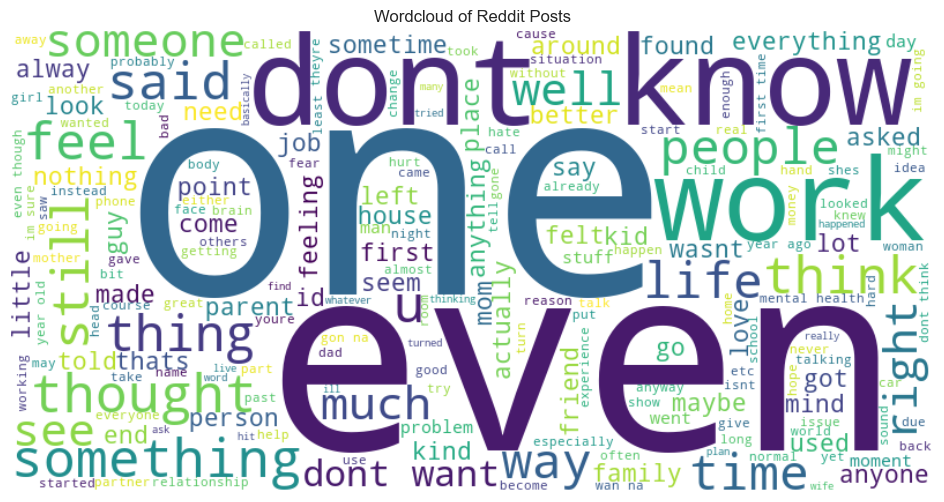

KeyboardInterrupt: 

In [10]:
# Step 7B: Wordcloud Visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized tokens into a single string for posts
post_text = ' '.join([word for tokens in reddit_posts['tokens_lemmatized'] for word in tokens])

# Generate and display wordcloud for posts
wordcloud_post = WordCloud(width=800, height=400, background_color='white').generate(post_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_post, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Reddit Posts')
plt.show()

# Repeat for comments
comment_text = ' '.join([word for tokens in reddit_comments['tokens_lemmatized'] for word in tokens])
wordcloud_comment = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_comment, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Reddit Comments')
plt.show()

In [11]:
# Step 7C: Bigram Analysis

from nltk import bigrams
from collections import Counter

# Generate bigrams for posts
post_bigrams = [bg for tokens in reddit_posts['tokens_lemmatized'] for bg in bigrams(tokens)]
post_bigram_counts = Counter(post_bigrams)

# Show top 20 bigrams in posts
print("Top 20 bigrams in posts:")
for bigram, count in post_bigram_counts.most_common(20):
    print(f"{bigram}: {count}")

# Generate bigrams for comments
comment_bigrams = [bg for tokens in reddit_comments['tokens_lemmatized'] for bg in bigrams(tokens)]
comment_bigram_counts = Counter(comment_bigrams)

# Show top 20 bigrams in comments
print("\nTop 20 bigrams in comments:")
for bigram, count in comment_bigram_counts.most_common(20):
    print(f"{bigram}: {count}")

Top 20 bigrams in posts:
('feel', 'like'): 19512
('dont', 'know'): 13037
('dont', 'want'): 7205
('like', 'im'): 5476
('anyone', 'else'): 3849
('felt', 'like'): 3781
('year', 'old'): 3398
('year', 'ago'): 3378
('even', 'though'): 3317
('mental', 'health'): 3213
('im', 'going'): 3009
('im', 'sure'): 2967
('dont', 'think'): 2901
('first', 'time'): 2800
('gon', 'na'): 2763
('wan', 'na'): 2750
('make', 'feel'): 2460
('dont', 'even'): 2444
('know', 'im'): 2366
('every', 'day'): 2363


MemoryError: 

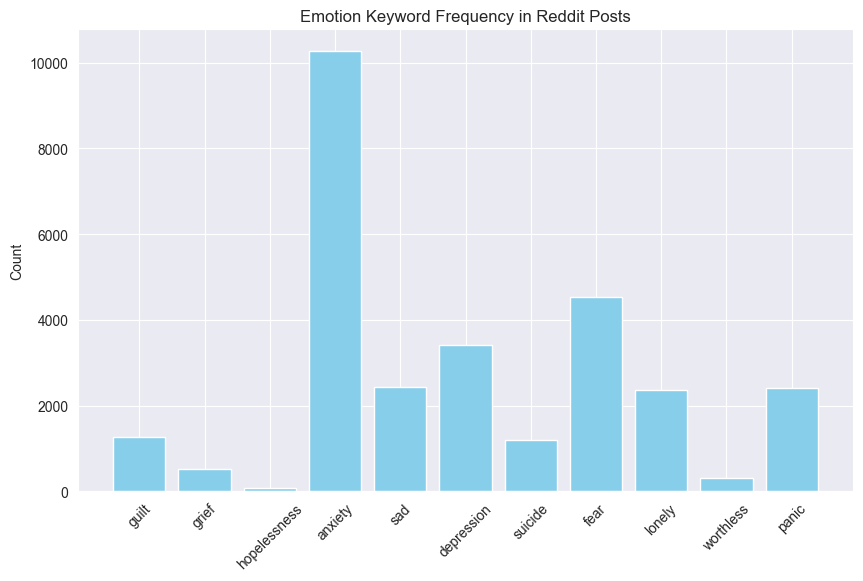

In [12]:
# 1. Emotion Keyword Frequency

emotion_keywords = ['guilt', 'grief', 'hopelessness', 'anxiety', 'sad', 'depression', 'suicide', 'fear', 'lonely', 'worthless', 'panic']

emotion_counts = {emotion: 0 for emotion in emotion_keywords}
for tokens in reddit_posts['tokens_lemmatized']:
    for emotion in emotion_keywords:
        emotion_counts[emotion] += tokens.count(emotion)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title('Emotion Keyword Frequency in Reddit Posts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

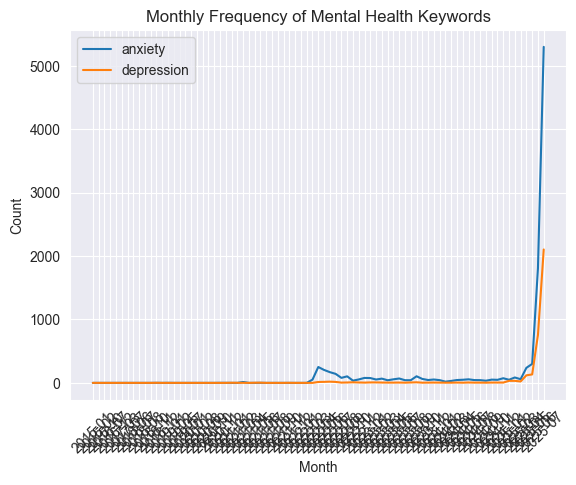

In [19]:
# Convert months to string for plotting
month_labels = [str(m) for m in months]

for kw in keywords:
    plt.plot(month_labels, trend_data[kw], label=kw)

plt.legend()
plt.title('Monthly Frequency of Mental Health Keywords')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

Month labels: ['2015-01', '2015-02', '2015-10', '2016-07', '2016-12', '2017-03', '2017-07', '2018-06', '2018-07', '2018-08', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-05', '2019-07', '2020-01', '2020-02', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06', '2025-07']
anxiety trend data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 14, 0, 0, 1, 0, 0

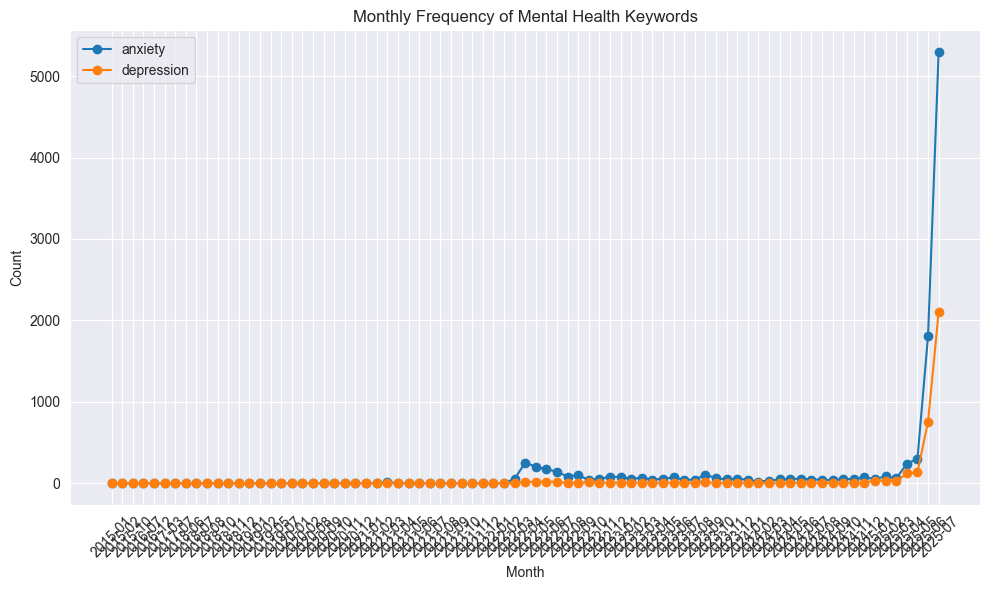

In [21]:
# Prepare month labels as strings
month_labels = [str(m) for m in months]

# Optional: print for debugging
print("Month labels:", month_labels)
for kw in keywords:
    print(f"{kw} trend data:", trend_data[kw])

# Plot using the string month labels
plt.figure(figsize=(10,6))
for kw in keywords:
    plt.plot(month_labels, trend_data[kw], label=kw, marker='o')
plt.legend()
plt.title('Monthly Frequency of Mental Health Keywords')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
print(len(month_labels), len(trend_data['anxiety']), len(trend_data['depression']))

79 79 79


In [25]:
import numpy as np
for kw in keywords:
    trend_data[kw] = [x if x is not None else 0 for x in trend_data[kw]]
    trend_data[kw] = [0 if (isinstance(x, float) and np.isnan(x)) else x for x in trend_data[kw]]

C:\Users\aipro\AppData\Local\Temp\ipykernel_15896\2434138695.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reddit_posts['month'] = reddit_posts['date'].dt.to_period('M')


TypeError: float() argument must be a string or a real number, not 'Period'

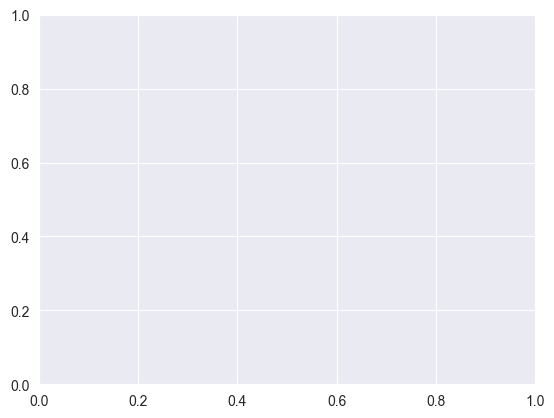

In [26]:
# 2. Temporal Trend Analysis (using 'date' column)

reddit_posts['date'] = pd.to_datetime(reddit_posts['date'])
reddit_posts['month'] = reddit_posts['date'].dt.to_period('M')

# Example: Track 'anxiety' and 'depression' over time
keywords = ['anxiety', 'depression']
trend_data = {kw: [] for kw in keywords}
months = sorted(reddit_posts['month'].unique())

for month in months:
    month_posts = reddit_posts[reddit_posts['month'] == month]
    for kw in keywords:
        count = sum([tokens.count(kw) for tokens in month_posts['tokens_lemmatized']])
        trend_data[kw].append(count)

for kw in keywords:
    plt.plot(months, trend_data[kw], label=kw)
plt.legend()
plt.title('Monthly Frequency of Mental Health Keywords')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

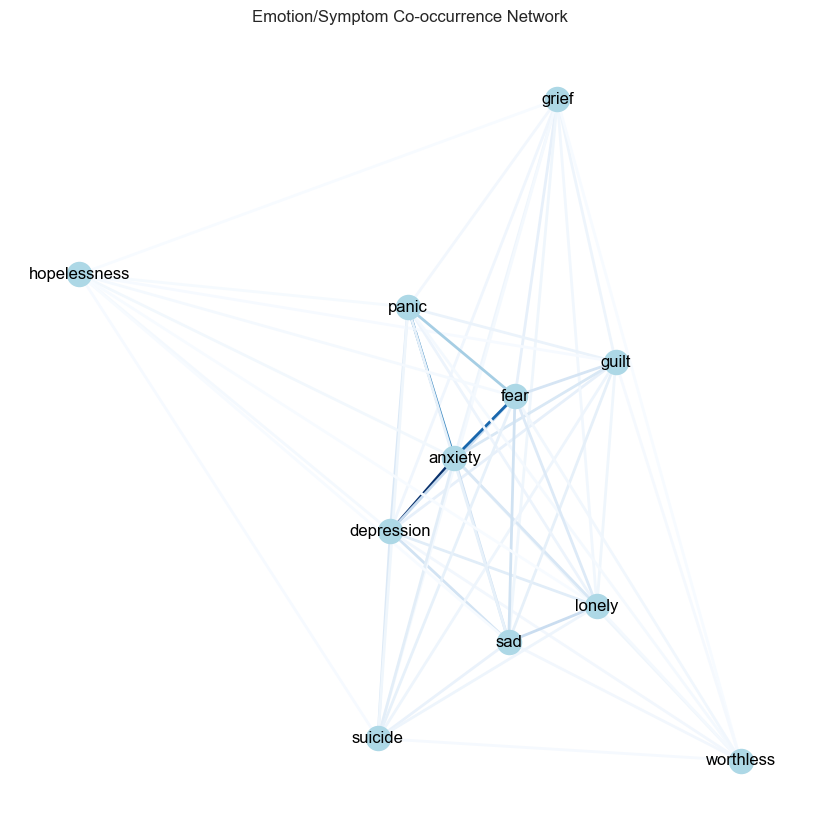

In [28]:
# 3. Co-occurrence Network

import networkx as nx
from itertools import combinations

# Count co-occurrences
co_occurrence = {}
for tokens in reddit_posts['tokens_lemmatized']:
    present_emotions = [e for e in emotion_keywords if e in tokens]
    for pair in combinations(sorted(present_emotions), 2):
        co_occurrence[pair] = co_occurrence.get(pair, 0) + 1

# Build network
G = nx.Graph()
for (e1, e2), weight in co_occurrence.items():
    G.add_edge(e1, e2, weight=weight)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues)
plt.title('Emotion/Symptom Co-occurrence Network')
plt.show()

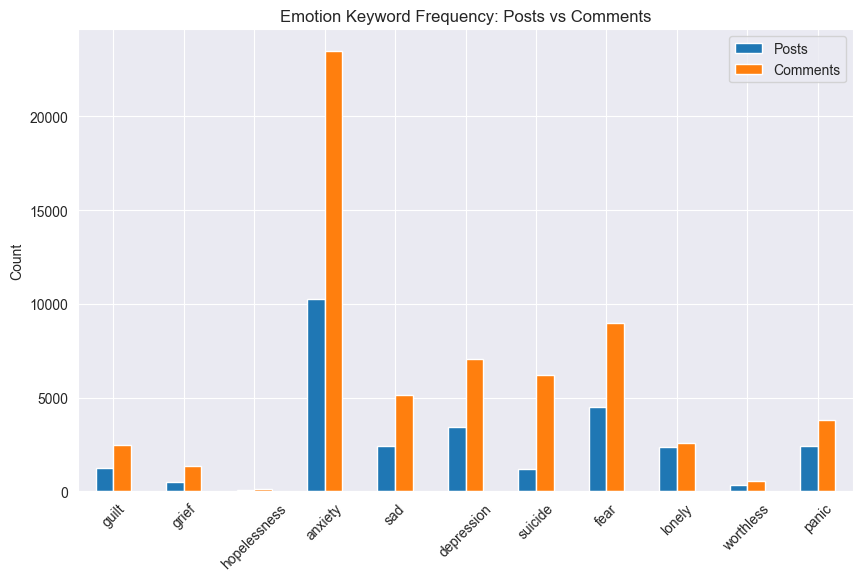

In [29]:
# 4. Compare Posts vs Comments

def count_emotions(df, col):
    counts = {emotion: 0 for emotion in emotion_keywords}
    for tokens in df[col]:
        for emotion in emotion_keywords:
            counts[emotion] += tokens.count(emotion)
    return counts

post_counts = count_emotions(reddit_posts, 'tokens_lemmatized')
comment_counts = count_emotions(reddit_comments, 'tokens_lemmatized')

df_compare = pd.DataFrame({'Posts': post_counts, 'Comments': comment_counts})
df_compare.plot(kind='bar', figsize=(10,6))
plt.title('Emotion Keyword Frequency: Posts vs Comments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

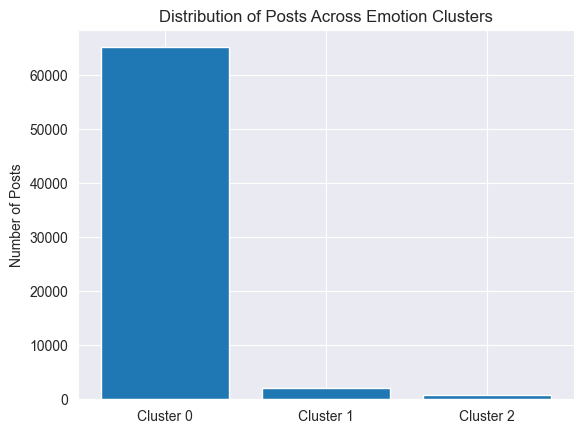

In [30]:
# 5. Emotion Clustering

from sklearn.cluster import KMeans
import numpy as np

# Create feature vectors for each post
features = []
for tokens in reddit_posts['tokens_lemmatized']:
    features.append([tokens.count(e) for e in emotion_keywords])
X = np.array(features)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

reddit_posts['emotion_cluster'] = labels

# Visualize cluster size
plt.bar(['Cluster 0', 'Cluster 1', 'Cluster 2'], reddit_posts['emotion_cluster'].value_counts().sort_index())
plt.title('Distribution of Posts Across Emotion Clusters')
plt.ylabel('Number of Posts')
plt.show()

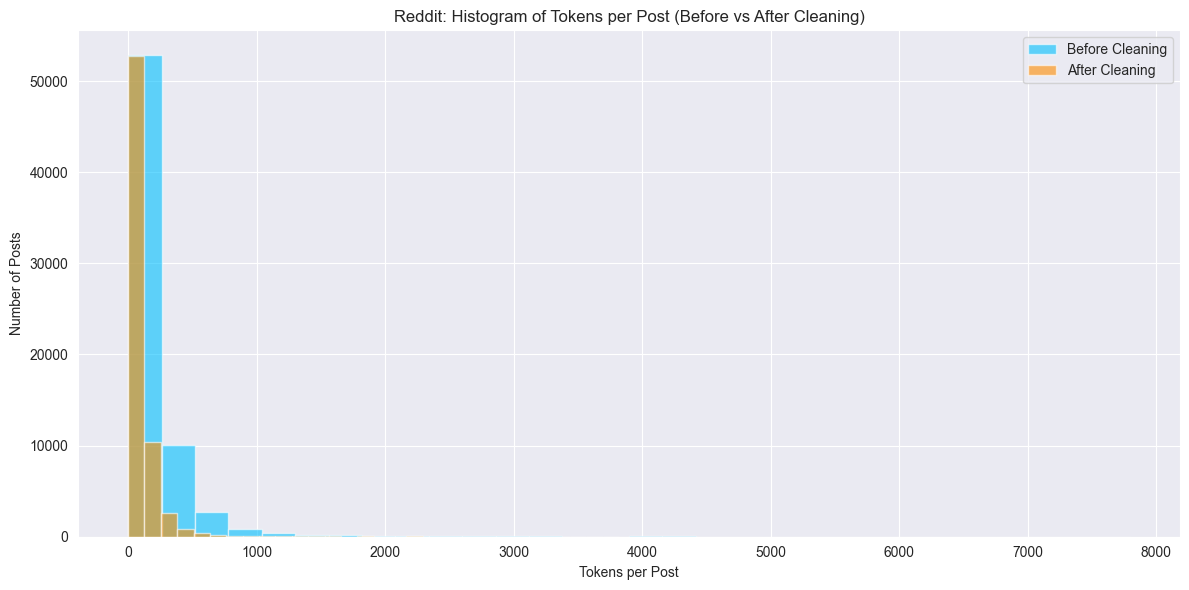

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

reddit_posts = pd.read_csv("reddit_posts_clean_final.csv")
reddit_posts_preprocessed = pd.read_csv("reddit_posts_preprocessed.csv")

# Before cleaning: count tokens in raw content
def original_token_count(text):
    if pd.isnull(text):
        return 0
    return len(nltk.word_tokenize(str(text)))

reddit_posts['original_token_count'] = reddit_posts['content'].apply(original_token_count)

# After cleaning: count tokens in lemmatized list
def token_count(x):
    if isinstance(x, str):
        return len(eval(x))
    return 0

reddit_posts_preprocessed['clean_token_count'] = reddit_posts_preprocessed['tokens_lemmatized'].apply(token_count)

plt.figure(figsize=(12,6))
plt.hist(reddit_posts['original_token_count'], bins=30, alpha=0.6, label='Before Cleaning', color='deepskyblue')
plt.hist(reddit_posts_preprocessed['clean_token_count'], bins=30, alpha=0.6, label='After Cleaning', color='darkorange')
plt.xlabel('Tokens per Post')
plt.ylabel('Number of Posts')
plt.title('Reddit: Histogram of Tokens per Post (Before vs After Cleaning)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_14084\3401432694.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reddit_token_counts, bb_token_counts], labels=['Reddit', 'Beyond Blue'], patch_artist=True,


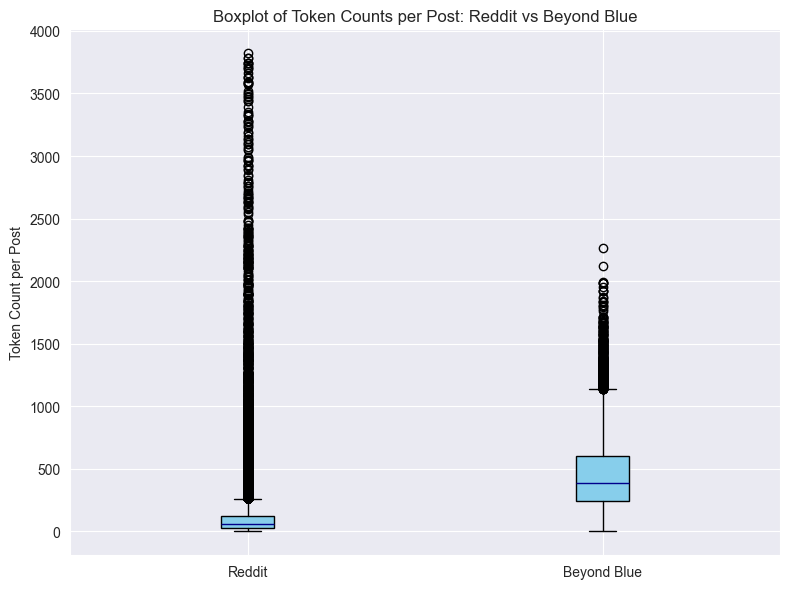

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load preprocessed data
reddit_posts = pd.read_csv("reddit_posts_preprocessed.csv")
bb_posts = pd.read_csv("bb_posts_preprocessed.csv")

def token_count(x):
    if isinstance(x, str):
        return len(eval(x))
    return 0

reddit_token_counts = reddit_posts['tokens_lemmatized'].apply(token_count)
bb_token_counts = bb_posts['tokens_lemmatized'].apply(token_count)

plt.figure(figsize=(8,6))
plt.boxplot([reddit_token_counts, bb_token_counts], labels=['Reddit', 'Beyond Blue'], patch_artist=True,
            boxprops=dict(facecolor='skyblue'), medianprops=dict(color='darkblue'))
plt.ylabel('Token Count per Post')
plt.title('Boxplot of Token Counts per Post: Reddit vs Beyond Blue')
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_14084\3401432694.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reddit_token_counts, bb_token_counts], labels=['Reddit', 'Beyond Blue'], patch_artist=True,


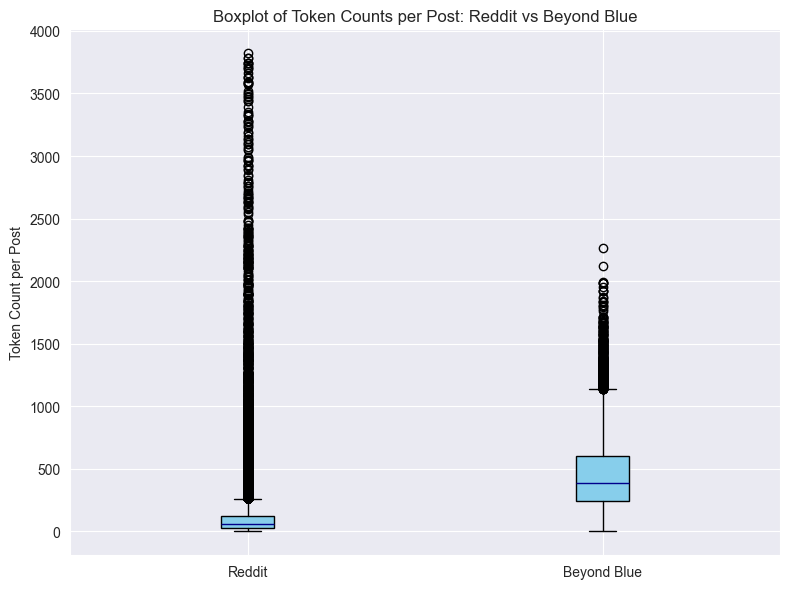

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load preprocessed data
reddit_posts = pd.read_csv("reddit_posts_preprocessed.csv")
bb_posts = pd.read_csv("bb_posts_preprocessed.csv")

def token_count(x):
    if isinstance(x, str):
        return len(eval(x))
    return 0

reddit_token_counts = reddit_posts['tokens_lemmatized'].apply(token_count)
bb_token_counts = bb_posts['tokens_lemmatized'].apply(token_count)

plt.figure(figsize=(8,6))
plt.boxplot([reddit_token_counts, bb_token_counts], labels=['Reddit', 'Beyond Blue'], patch_artist=True,
            boxprops=dict(facecolor='skyblue'), medianprops=dict(color='darkblue'))
plt.ylabel('Token Count per Post')
plt.title('Boxplot of Token Counts per Post: Reddit vs Beyond Blue')
plt.tight_layout()
plt.show()

In [5]:
import matplotlib.pyplot as plt

words_before, counts_before = zip(*freq_before)
words_after, counts_after = zip(*freq_after)

plt.figure(figsize=(12,5))
plt.bar(words_before, counts_before, alpha=0.7, label='Before Lemmatization', color='deepskyblue')
plt.xticks(rotation=45)
plt.title('Top 20 Words Before Lemmatization (Reddit Posts)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,5))
plt.bar(words_after, counts_after, alpha=0.7, label='After Lemmatization', color='darkorange')
plt.xticks(rotation=45)
plt.title('Top 20 Words After Lemmatization (Reddit Posts)')
plt.ylabel('Frequency')
plt.show()

NameError: name 'freq_before' is not defined

Vocabulary size BEFORE lemmatization: 122313
Vocabulary size AFTER lemmatization: 113410


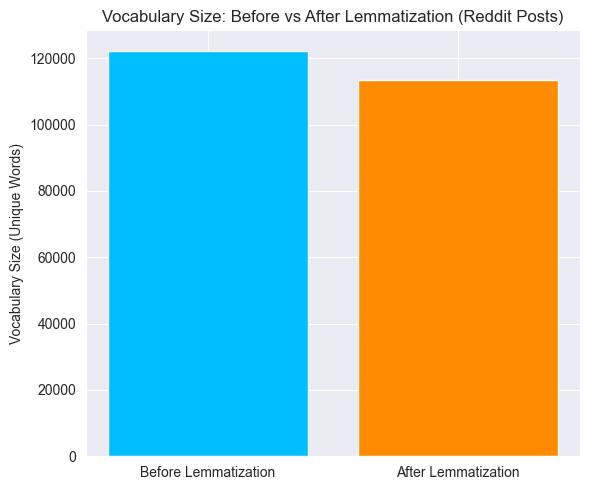

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

reddit_posts = pd.read_csv("reddit_posts_preprocessed.csv")

def to_tokens(x):
    if isinstance(x, str):
        return eval(x)
    return []

tokens_before = reddit_posts['tokens_nostop'].apply(to_tokens).explode().dropna().tolist()
tokens_after = reddit_posts['tokens_lemmatized'].apply(to_tokens).explode().dropna().tolist()

vocab_size_before = len(set(tokens_before))
vocab_size_after = len(set(tokens_after))

print(f"Vocabulary size BEFORE lemmatization: {vocab_size_before}")
print(f"Vocabulary size AFTER lemmatization: {vocab_size_after}")

plt.figure(figsize=(6,5))
plt.bar(['Before Lemmatization', 'After Lemmatization'], [vocab_size_before, vocab_size_after],
        color=['deepskyblue', 'darkorange'])
plt.ylabel('Vocabulary Size (Unique Words)')
plt.title('Vocabulary Size: Before vs After Lemmatization (Reddit Posts)')
plt.tight_layout()
plt.show()